# Week 4 Quiz

## Chenxi Jiang - cj2706

### Due Tuesday Oct 4th 11:59pm ET

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In this quiz we'll calculate a 95% confidence interval for the mean value of 'flavanoids' from the wine dataset.

In [2]:
# Read in ../data/wine_dataset.csv as df
df = pd. read_csv(r'../data/wine_dataset.csv', header = 0)

# print .info() on df for a summary of the dataset
print(df. info)

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

/var/folders/66/ghfk0zwj4rd_cl_h1rkkzt1c0000gn/T/ipykernel_20541/2307958194.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns. barplot(x = df.flavanoids, estimator= np. mean, ci= 95)


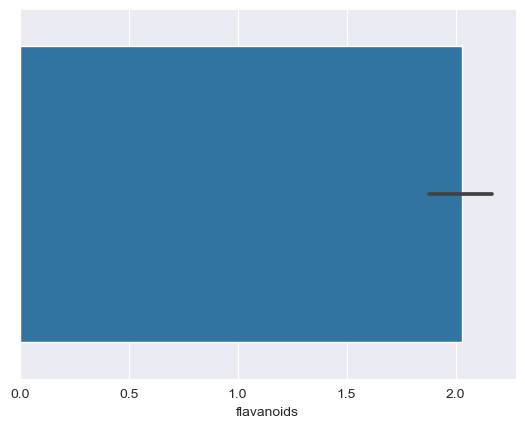

In [3]:
# Generate a barplot of the 'flavenoids' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
ax = sns. barplot(x = df.flavanoids, estimator= np. mean, ci= 95)

In [4]:
# Assign the mean value of flavanoids to variable observed_mean
observed_mean = df.flavanoids. mean()

# Print the observed mean with a precision of 2
observed_mean.round(2)

2.03

In [5]:
# generate a bootstrap sample of df.flavanoids (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=0 so our answers will match
#   assign the result to sample
sample = df.flavanoids.sample(frac = 1, random_state =0, replace= True )

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check: are you sampling with replacement?
print(f'Mean = {sample. mean():0.2f}')

Mean = 2.16


In [6]:
# Generate 1000 additional sample means using bootstrap sampling from the 'flavanoids' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = []
for i in range(1000):
    boot_sample = df.flavanoids.sample(frac = 1,replace= True )
    sample_means.append(boot_sample. mean())

# Print the first 5 values in sample_means
sample_means[:5]

[1.898876404494382,
 1.8967977528089888,
 2.138258426966292,
 1.983932584269663,
 2.101685393258427]

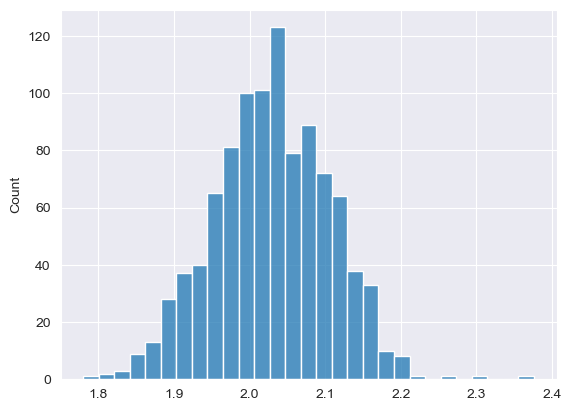

In [7]:
# Plot the distribution of sample means using sns.histplot()
ax = sns. histplot(sample_means)

In [8]:
# To get the 95% confidence interval, we want to retain the central 95% of our sample_means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.
trim_amount = 0.025 * len(sample_means)

# print the trim_amount, the number of elements we'll trim from each end of the sorted list
trim_amount

25.0

In [9]:
# We want to index into our sample_means, but trim_amount is a float.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np. round(trim_amount))

# Print trim_idx
trim_idx

25

In [10]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample_means.
# Use np.sort() to return a sorted numpy array 
#   then use a list of the indices we want, [trim_idx,-trim_idx-1], to use "fancy indexing" on this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,- trim_idx- 1]]

# Print the ci values and visually compare the endpoints of the CI in the barplot above.
ci

array([1.87707865, 2.16932584])